In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

##### Lecture 7

## Census ##

In [5]:
full = Table.read_table('nc-est2014-agesex-res.csv')
full.show(30)

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [6]:
partial = full.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014')
partial

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [12]:
simple = partial.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2014', '2014')
simple

SEX,AGE,2010,2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [13]:
simple.sort('AGE', descending=True)

SEX,AGE,2010,2014
2,999,157257573,161920569
1,999,152089484,156936487
0,999,309347057,318857056
2,100,45058,58468
1,100,9351,13729
0,100,54409,72197
2,99,26074,32791
1,99,6104,9037
0,99,32178,41828
2,98,37533,46536


In [16]:
no_999 = simple.where('AGE', are.below(999))
no_999

SEX,AGE,2010,2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [17]:
everyone = no_999.where('SEX', 0).drop('SEX')
males = no_999.where('SEX', 1).drop('SEX')
females = no_999.where('SEX', 2).drop('SEX')

In [18]:
females

AGE,2010,2014
0,1932910,1930493
1,1937556,1938870
2,2002177,1935270
3,2010648,1956572
4,1993240,1959950
5,1988080,1961391
6,1993603,2024024
7,1979908,2031760
8,1971142,2014402
9,2018378,2009560


In [20]:
females.sort('2014', descending=True)

AGE,2010,2014
54,2196798,2331961
53,2268457,2316131
24,2082209,2301237
23,2066126,2298701
51,2289164,2283261
52,2283408,2282051
50,2355349,2279824
55,2183762,2263367
56,2108681,2254749
22,2098759,2244480


In [21]:
males.sort('2014', descending=True)

AGE,2010,2014
23,2151095,2399883
24,2161380,2391398
22,2188228,2367842
21,2241095,2310734
25,2177171,2295836
20,2331846,2269570
54,2091677,2242828
26,2102375,2240026
19,2334906,2220790
53,2170965,2219617


In [31]:
pop_2014 = Table().with_columns(
    'Age', males['AGE'],
    'Males', males['2014'],
    'Females', females['2014']
)

In [32]:
pop_2014

Age,Males,Females
0,2017857,1930493
1,2023253,1938870
2,2022502,1935270
3,2048618,1956572
4,2043498,1959950
5,2043467,1961391
6,2110328,2024024
7,2122240,2031760
8,2105122,2014402
9,2097272,2009560


In [35]:
percent_females = 100*pop_2014['Females']/(pop_2014.column('Males') + pop_2014.column('Females'))
counts_and_percents = pop_2014.with_column('Percent Female', percent_females)

In [36]:
counts_and_percents

Age,Males,Females,Percent Female
0,2017857,1930493,48.8937
1,2023253,1938870,48.9351
2,2022502,1935270,48.898
3,2048618,1956572,48.8509
4,2043498,1959950,48.9565
5,2043467,1961391,48.9753
6,2110328,2024024,48.9563
7,2122240,2031760,48.9109
8,2105122,2014402,48.8989
9,2097272,2009560,48.9321


## Line Graphs ##

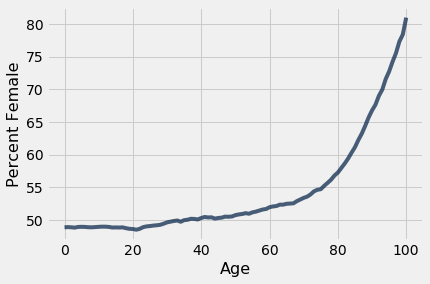

In [37]:
counts_and_percents.plot('Age', 'Percent Female')

In [38]:
pop_2014

Age,Males,Females
0,2017857,1930493
1,2023253,1938870
2,2022502,1935270
3,2048618,1956572
4,2043498,1959950
5,2043467,1961391
6,2110328,2024024
7,2122240,2031760
8,2105122,2014402
9,2097272,2009560


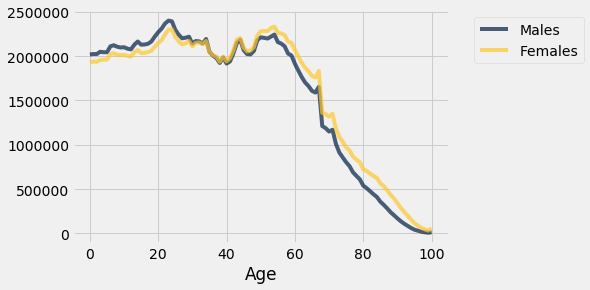

In [39]:
pop_2014.plot('Age')

In [40]:
pop_2014.where('Age', are.between(65, 75))

Age,Males,Females
65,1607688,1776761
66,1589127,1758649
67,1653257,1832245
68,1211480,1361047
69,1187554,1347458
70,1149247,1317238
71,1169356,1350392
72,1010896,1183338
73,913008,1089183
74,857432,1032934


In [41]:
2014 - np.arange(67, 73)

array([1947, 1946, 1945, 1944, 1943, 1942])

In [42]:
everyone

AGE,2010,2014
0,3951330,3948350
1,3957888,3962123
2,4090862,3957772
3,4111920,4005190
4,4077552,4003448
5,4064653,4004858
6,4073013,4134352
7,4043047,4154000
8,4025604,4119524
9,4125415,4106832


In [44]:
everyone = everyone.with_columns(
    'Change', everyone.column('2014') - everyone.column('2010')
)

In [45]:
everyone.sort('Change', descending=True)

AGE,2010,2014,Change
67,2693709,3485502,791793
64,2706063,3488136,782073
66,2621346,3347776,726430
65,2678532,3384449,705917
71,1953614,2519748,566134
34,3822188,4362895,540707
23,4217221,4698584,481363
59,3694276,4155417,461141
24,4243589,4692635,449046
70,2062581,2466485,403904


In [46]:
everyone.with_columns(
    'Growth Rate', (everyone.column('2014')/everyone.column('2010')) ** (1/4) - 1
).sort('Growth Rate', descending=True)

AGE,2010,2014,Change,Growth Rate
100,54409,72197,17788,0.0732777
93,219063,286333,67270,0.069241
99,32178,41828,9650,0.0677683
67,2693709,3485502,791793,0.0665437
71,1953614,2519748,566134,0.0656868
64,2706063,3488136,782073,0.0655256
94,170775,218655,47880,0.0637358
98,47037,60185,13148,0.0635604
66,2621346,3347776,726430,0.0630606
65,2678532,3384449,705917,0.0602244


## Scatter Plots ##

In [47]:
actors = Table.read_table('actors.csv')

In [48]:
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


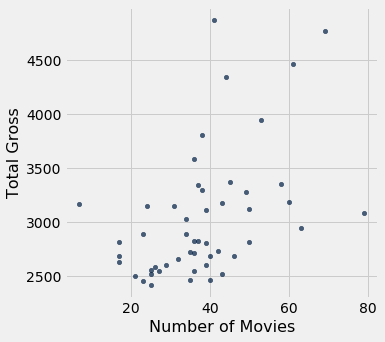

In [49]:
actors.scatter('Number of Movies', 'Total Gross')

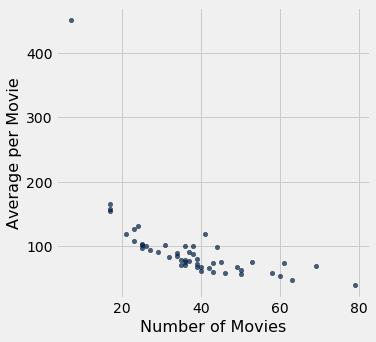

In [50]:
actors.scatter('Number of Movies', 'Average per Movie')

In [51]:
actors.where('Average per Movie', are.above(150))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7
Orlando Bloom,2815.8,17,165.6,Dead Man's Chest,423.3
Emma Watson,2681.9,17,157.8,Harry Potter / Deathly Hallows (P2),381
Daniel Radcliffe,2634.4,17,155,Harry Potter / Deathly Hallows (P2),381
